In [1]:
from mesh import Mesh
from dt_mesh_deformation import DT_Mesh_Deform
from dtrbf_mesh_deformation import DTRBF1_Mesh_Deform
import numpy as np

In [2]:
v = []
for i in range(0,21):
  for j in range(0,21):
    if not (i >= 9 and i <= 11 and j == 10):
      v.append([i,j])

f = []
for i in range(0,20):
  for j in range(0,20):
    if not (i >= 8 and i <= 11 and j >= 9 and j <= 10):      
      f.append([[i,j], [i+1,j], [i+1,j+1], [i,j+1]])


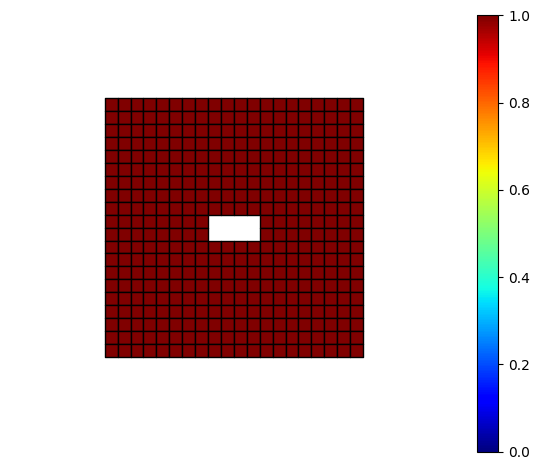

In [3]:
fi = Mesh.faces_points_to_index(v, f)
mesh = Mesh(v,fi,2)
mesh.visualize(max_x = 20, max_y = 20, show_axis=False)

In [4]:
exterior = []

for i in range(0,21):
  exterior.append([0,i])
  exterior.append([20,i])
for i in range(1,20):
  exterior.append([i,0])
  exterior.append([i,20])

for i in range(8,13):
  exterior.append([i,9])
  exterior.append([i,11])

exterior.append([8,10])
exterior.append([12,10])

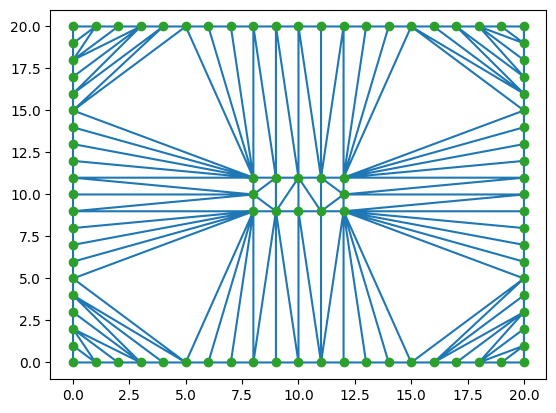

In [5]:
DT_Mesh_Deform.visualize_delaunay(exterior)

In [8]:
exterior_mapping = {}

for p in exterior:
  x = p[0]
  y = p[1]

  if (x >= 5 and x <= 15 and y >= 5 and y <= 15):
    exterior_mapping[(x,y)] = (x+4,y+4)
  else:
    exterior_mapping[(x,y)] = (x,y)


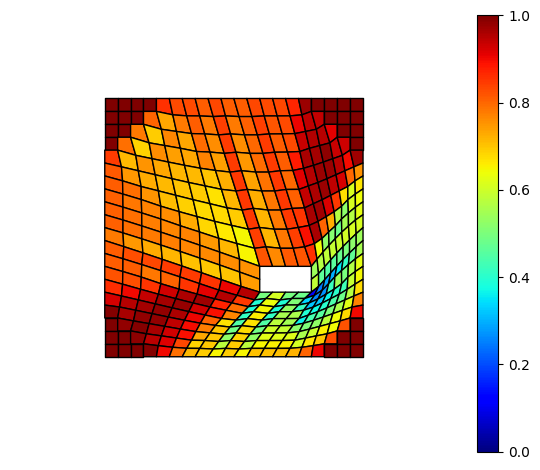

0.11779347297897276


In [10]:
new_mesh = DTRBF1_Mesh_Deform.deform(mesh, exterior, exterior_mapping)
new_mesh.visualize(max_x = 20, max_y = 20, show_axis=False)
print(min(new_mesh.qualities))